<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Intro

## Reconstructing

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model




(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

latent_dim = 64

class Autoencoder(Model):

  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(latent_dim, activation='relu')
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(784, activation='sigmoid'),
      tf.keras.layers.Reshape((28,28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return decoded

autoencoder = Autoencoder(latent_dim)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0239 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

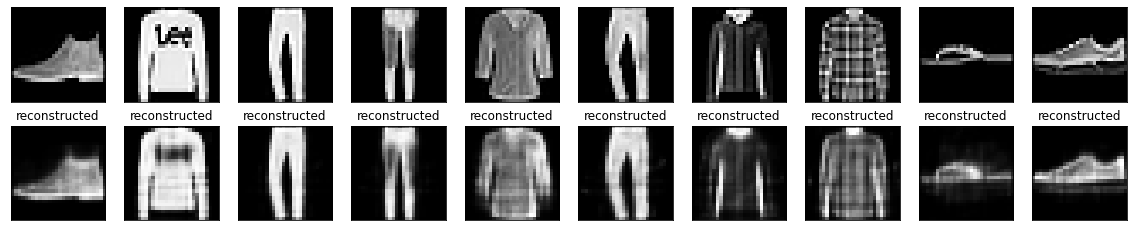

In [3]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# Plot encoded/decoded images
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  # Display original at top
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.gray()

  # Set axis invisible
  ax.get_yaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)

  # Display reconstruced at bottom
  ax = plt.subplot(2,n, n + i + 1)

  plt.imshow(decoded_imgs[i])

  plt.title("reconstructed")
  plt.gray()

  # Set axis invisible
  ax.get_yaxis().set_visible(False)
  ax.get_xaxis().set_visible(False)

plt.show()

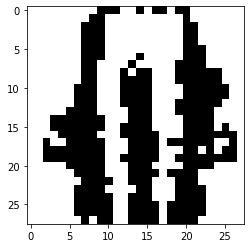

In [27]:
### Show difference between two images
def plot_diff(orig, rec, err=.1):
  diff_img = np.isclose(rec, orig, rtol=err, atol=1E-3)
  plt.subplot(1,1,1)
  plt.imshow(diff_img)

In [ ]:
## Image denoising

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]